In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from adjustText import adjust_text

In [95]:
model = pd.read_excel("Current_Model_Build.xlsx")

In [96]:
model.head()

,Country,Subregion,Population,European Union Association,MSCI_IVA_Adjusted_Mean,MSCI_AGR_Var_Mean,MSCI_Governance_Score_Mean,2024_CCPI_GHG,2024_CCPI_Renewables,2024_CCPI_Energy_Use,2024_CCPI_Climate_Policy,2023_WPR_ND_Risk_Exposure,2023_WPR_ND_Risk_Vulnerability,2023_WPR_ND_Risk_Susceptibility,2023_WPR_ND_Lack_Adaptive_Capacities,2023_WPR_ND_Lack_Coping_Capacities,Labelled_Sustainable_Bonds_per_GDP,Unlabelled_Sustainable_Bonds_per_GDP
0,Albania,Southeast Europe,2837743,No Association,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.29,16.95,11.51,37.51,11.28,0.000000,0.000000
1,Austria,Central Europe,8917205,European Union (EU),7.861111,5.129630,6.848649,61.075,44.6,54.75,69.35,0.15,8.84,4.44,19.53,7.98,0.024580,0.032968
2,Belarus,Eastern Europe,9398861,No Association,NaN,NaN,NaN,62.300,16.2,68.90,24.30,0.05,11.14,6.49,36.57,5.83,0.000000,0.000000
3,Belgium,Western Europe,11555997,European Union (EU),7.961538,4.899083,6.620370,63.225,31.3,52.75,64.50,1.84,18.49,8.03,28.91,27.21,0.030916,0.024777
4,Bosnia and Herzegovina,Southeast Europe,3280815,No Association,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.34,20.28,14.13,51.26,11.51,0.000000,0.000000


In [97]:
model.dropna(how='any')

,Country,Subregion,Population,European Union Association,MSCI_IVA_Adjusted_Mean,MSCI_AGR_Var_Mean,MSCI_Governance_Score_Mean,2024_CCPI_GHG,2024_CCPI_Renewables,2024_CCPI_Energy_Use,2024_CCPI_Climate_Policy,2023_WPR_ND_Risk_Exposure,2023_WPR_ND_Risk_Vulnerability,2023_WPR_ND_Risk_Susceptibility,2023_WPR_ND_Lack_Adaptive_Capacities,2023_WPR_ND_Lack_Coping_Capacities,Labelled_Sustainable_Bonds_per_GDP,Unlabelled_Sustainable_Bonds_per_GDP
1,Austria,Central Europe,8917205,European Union (EU),7.861111,5.129630,6.848649,61.075,44.60,54.75,69.35,0.15,8.84,4.44,19.53,7.98,0.024580,0.032968
3,Belgium,Western Europe,11555997,European Union (EU),7.961538,4.899083,6.620370,63.225,31.30,52.75,64.50,1.84,18.49,8.03,28.91,27.21,0.030916,0.024777
9,Denmark,Northern Europe,5831404,European Union (EU),8.444444,4.867257,7.920755,74.500,75.05,67.65,86.20,0.18,5.42,3.47,28.66,1.60,0.016200,0.064201
11,Finland,Northern Europe,5530719,European Union (EU),8.979167,4.690141,7.712000,63.450,66.95,22.45,89.30,0.49,4.20,5.71,26.53,0.49,0.021202,0.057559
12,France,Western Europe,67391582,European Union (EU),8.165714,4.855478,6.725000,67.550,22.75,64.20,63.55,2.70,20.23,8.46,33.29,29.38,0.021473,0.057850
13,Germany,Western Europe,83240525,European Union (EU),7.971014,4.661616,6.719617,71.175,36.90,72.70,76.95,1.99,9.28,7.02,35.42,3.21,0.011709,0.050987
14,Greece,Southern Europe,10715549,European Union (EU),7.733333,4.862069,6.304762,64.325,39.60,81.20,52.25,8.25,8.93,8.82,9.98,8.09,0.009962,0.000668
17,Ireland,Northern Europe,4994724,European Union (EU),8.140000,4.756410,7.559615,50.425,35.30,70.55,50.40,1.45,7.30,4.59,24.76,3.43,0.024619,0.028218
18,Italy,Southern Europe,59554023,European Union (EU),7.544643,4.525926,6.626087,58.000,36.90,67.60,32.45,8.69,11.43,7.96,35.77,5.25,0.012011,0.028560
23,Luxembourg,Western Europe,632275,European Union (EU),7.210526,4.180000,6.143243,80.575,47.50,59.20,57.60,0.06,6.81,5.36,10.22,5.76,0.141665,0.164778


In [98]:
import pandas as pd

# Run this script to build the model into an xlsx file

# Each part of the model, as a csv or xlsx file, read as a dataframe
countries = pd.read_excel(r"C:\\Users\\gusta\\GitHub\\Data501_Project\\European Countries.xlsx")
msci = pd.read_csv(r"C:\\Users\\gusta\\GitHub\\Data501_Project\\governance\\MSCI Ratings Aggregated.csv")
ccpi = pd.read_csv(r"C:\\Users\\gusta\\GitHub\\Data501_Project\\Environmental\\ccpi_2024.csv")
wpr = pd.read_csv(r"C:\\Users\\gusta\\GitHub\\Data501_Project\\Climate_risk\\2023_WPR_Natural_Disaster_Index_Europe.csv")


# Recall that the nominal_gdp data is in billions, and the bonds are to the dollar
bonds_per_gdp = pd.read_csv(r"C:\\Users\\gusta\\GitHub\\Data501_Project\\Bonds\\Europe_Green_Bonds_Percentage_of_GDP.csv")
bonds_per_gdp.replace({"Slovak Republic": "Slovakia"}, inplace=True)

# Resulting model
model = pd.merge(countries, msci, on = 'Country', how = 'left')\
            .merge(ccpi, on = 'Country', how = 'left')\
            .merge(wpr, on = 'Country', how = 'left')\
            .merge(bonds_per_gdp, on="Country", how="left")

model.to_excel("Current_Model_Build.xlsx", index=False)

In [1]:
model.dropna(how="any").to_excel("No Nulls.xlsx", index=False)

NameError: name 'model' is not defined

In [100]:
no_nulls = model.dropna()[['Country', '2024_CCPI_Climate_Policy', 'Labelled_Sustainable_Bonds_per_GDP', 'Unlabelled_Sustainable_Bonds_per_GDP']]

In [101]:
no_nulls['Total Sustainable Bonds Issued per GDP'] = no_nulls['Labelled_Sustainable_Bonds_per_GDP'] + no_nulls['Unlabelled_Sustainable_Bonds_per_GDP']

In [102]:
no_nulls

,Country,2024_CCPI_Climate_Policy,Labelled_Sustainable_Bonds_per_GDP,Unlabelled_Sustainable_Bonds_per_GDP,Total Sustainable Bonds Issued per GDP
1,Austria,69.35,0.024580,0.032968,0.057547
3,Belgium,64.50,0.030916,0.024777,0.055693
9,Denmark,86.20,0.016200,0.064201,0.080401
11,Finland,89.30,0.021202,0.057559,0.078761
12,France,63.55,0.021473,0.057850,0.079323
13,Germany,76.95,0.011709,0.050987,0.062696
14,Greece,52.25,0.009962,0.000668,0.010630
17,Ireland,50.40,0.024619,0.028218,0.052837
18,Italy,32.45,0.012011,0.028560,0.040571
23,Luxembourg,57.60,0.141665,0.164778,0.306443


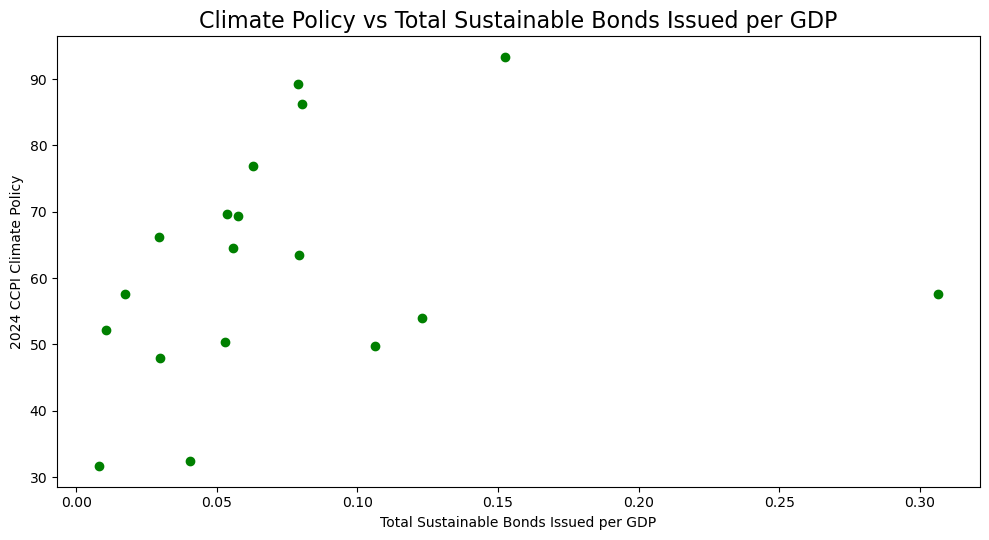

In [103]:
fig, ax = plt.subplots(figsize=(10, 5.5))

# Scatter plot
ax.scatter(no_nulls['Total Sustainable Bonds Issued per GDP'], no_nulls['2024_CCPI_Climate_Policy'], color='green')

# Adding labels and title
ax.set_xlabel('Total Sustainable Bonds Issued per GDP')
ax.set_ylabel('2024 CCPI Climate Policy')
ax.set_title('Climate Policy vs Total Sustainable Bonds Issued per GDP', fontsize=16)

plt.tight_layout()
plt.show()

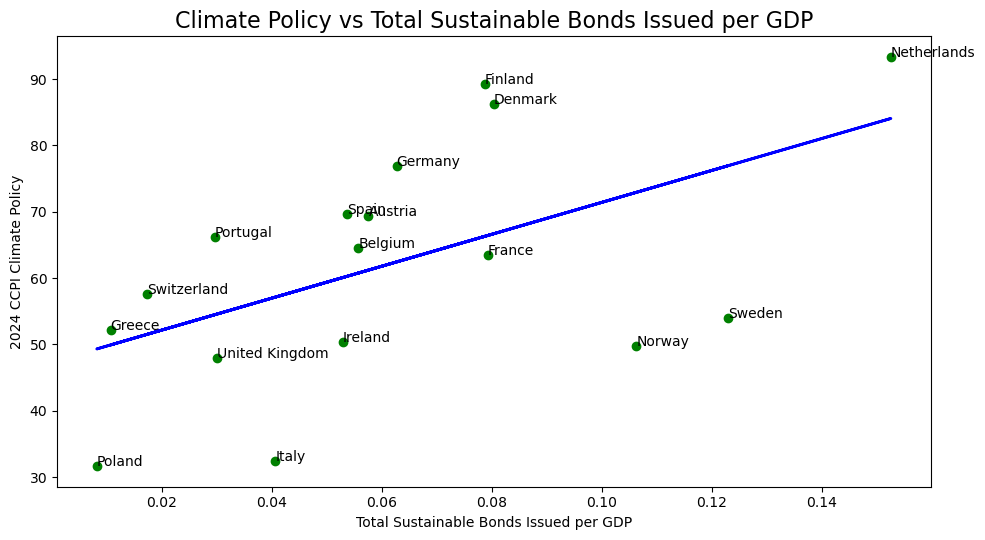

In [104]:
no_nulls = no_nulls[no_nulls['Country'] != 'Luxembourg']

# Prepare the data for regression
X = no_nulls['Total Sustainable Bonds Issued per GDP'].values.reshape(-1, 1)
y = no_nulls['2024_CCPI_Climate_Policy'].values

# Fit the regression model
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5.5))

# Scatter plot
ax.scatter(no_nulls['Total Sustainable Bonds Issued per GDP'], no_nulls['2024_CCPI_Climate_Policy'], color='green')

# Regression line
ax.plot(no_nulls['Total Sustainable Bonds Issued per GDP'], y_pred, color='blue', linewidth=2)

# Adding labels and title
ax.set_xlabel('Total Sustainable Bonds Issued per GDP')
ax.set_ylabel('2024 CCPI Climate Policy')
ax.set_title('Climate Policy vs Total Sustainable Bonds Issued per GDP', fontsize=16)

# Annotate each point with the country name
texts = [ax.text(x, y, text) for x, y, text in zip(no_nulls['Total Sustainable Bonds Issued per GDP'], no_nulls['2024_CCPI_Climate_Policy'], no_nulls['Country'])]

plt.tight_layout()
plt.show()

In [105]:
r_squared = model.score(X, y)

In [106]:
r_squared

0.2822766726941335